<h1> Titanic: Machine Learning from Disaster </h1>

---


**Problem Statement**: To predict if a passenger survived the sinking of the Titanic or not.

**Competition Link**: https://www.kaggle.com/c/titanic

&nbsp; 

&nbsp;


**Solution by**: Aditya Karanth.

**GitHub Profile**: https://github.com/Aditya-Karanth

**Kaggle Profile**: https://www.kaggle.com/adityakaranth



<h3>Project Planning :</h3> 

  - **Exploratory Data Analysis (EDA) -**
    - Understand nature of the data *.info()*, *.describe()*
    - Plot Histograms for numeric data
    - Plot Value counts for categorical data
    
  - **Data Preprocessing -**
    - **Handling missing data**: 
      - Obtaining missing data from heatmaps and corr plots. 
      - Filling missing values using *Linear Regression* and *mean*.
      - Dropping columns with higher missing values.

    - **Data Cleaning**: 
      - Removing unwanted columns eg. PassengerId, Name, Ticket.

    - **Data Preparation**:
      - Converting categorical columns in to numerical columns with *OneHotEncoding*. 
    
    - **Model Selection**:
      - Classification using *Logistic Regression* with *GridSearchCV* by obtaining the best parameters


# Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (10,6)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.read_csv('gender_submission.csv')

# Training Data (*df_train*)
---


## Exploring Data



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Get numeric columns
print('Numeric cols :',df_train.select_dtypes(include=[np.number]).columns.values)

Numeric cols : ['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']


In [ ]:
# Get Non-numeric columns
print('Categorical cols :',df_train.select_dtypes(exclude=[np.number]).columns.values)

Categorical cols : ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [ ]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jenkin, Mr. Stephen Curnow",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


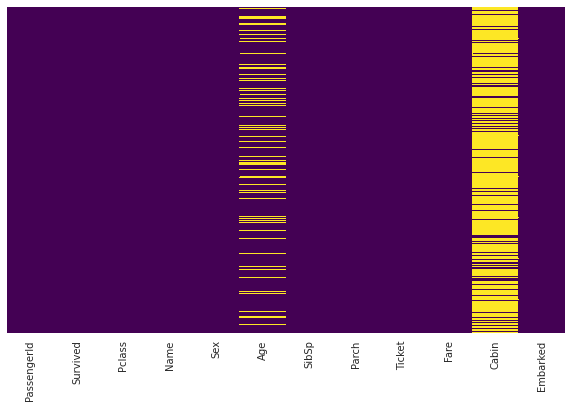

In [ ]:
# Check for missing data
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Number of missing values
print(df_train.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [ ]:
# Number of missing %
print(round((df_train.isnull().mean()*100).sort_values(ascending=False),2))

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64


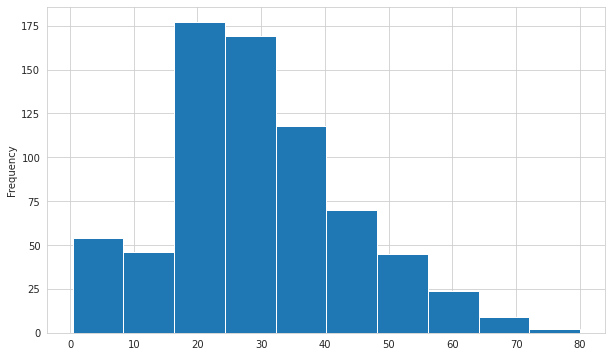

In [ ]:
df_train['Age'].dropna().plot.hist()

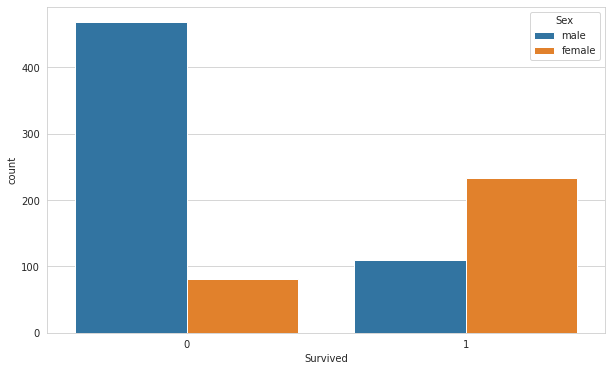

In [ ]:
sns.countplot(x='Survived', hue='Sex',data=df_train)

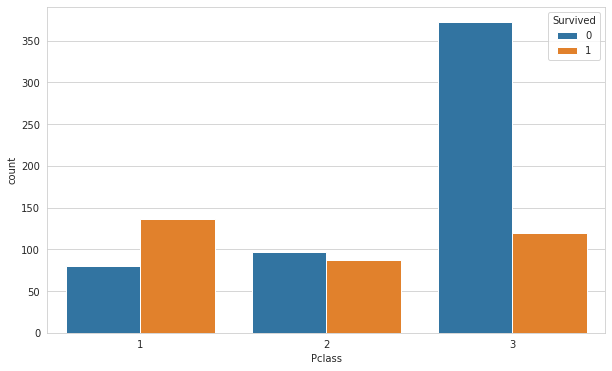

In [ ]:
sns.countplot(x='Pclass', hue='Survived',data=df_train)

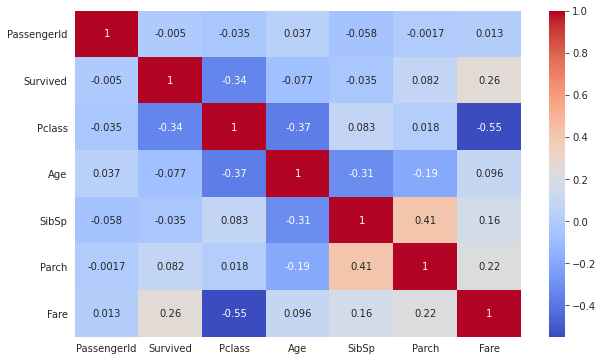

In [ ]:
# Correlation plot
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')

## Filling missing data in *df_train*




### Using LinearRegression model to predict missing Age

The '*df_train*' is divided in to two parts
- Data Frame with "**Available Age**" (Training Data set)
- Data Frame with "**Missing Age**" (Testing Data set)


In [ ]:
df_train_missingAge = df_train[df_train['Age'].isnull()]
print('No of data points with Age missing = {}\n'.format(len(df_train_missingAge)))
print(df_train_missingAge)

No of data points with Age missing = 177

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
5              6         0       3  ...   8.4583   NaN         Q
17            18         1       2  ...  13.0000   NaN         S
19            20         1       3  ...   7.2250   NaN         C
26            27         0       3  ...   7.2250   NaN         C
28            29         1       3  ...   7.8792   NaN         Q
..           ...       ...     ...  ...      ...   ...       ...
859          860         0       3  ...   7.2292   NaN         C
863          864         0       3  ...  69.5500   NaN         S
868          869         0       3  ...   9.5000   NaN         S
878          879         0       3  ...   7.8958   NaN         S
888          889         0       3  ...  23.4500   NaN         S

[177 rows x 12 columns]


In [ ]:
df_train_availableAge = df_train[df_train['Age'].notnull()]
print('No of data points with Age NOT missing = {}\n'.format(len(df_train_availableAge)))
print(df_train_availableAge)

No of data points with Age NOT missing = 714

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
885          886         0       3  ...  29.1250   NaN         Q
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[714 rows x 12 columns]


In [ ]:
# All numerical cols of known Age data points as training data
X_train1 = df_train_availableAge[['Pclass', 'Fare', 'SibSp','Parch']] 

# Age of known data points as Target
y_train1 = df_train_availableAge['Age']

# All numerical cols of missing Age data points as training data
X_test1 = df_train_missingAge[['Pclass', 'Fare', 'SibSp','Parch']]

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_age1 = lr1.predict(X_test1)
predicted_age1 = np.round(predicted_age1,1)
print(predicted_age1)

[27.5 34.2 27.5 27.5 27.5 27.5 34.5 27.5 27.5 27.5 27.5 23.6 27.5 19.6
 40.5 40.7 22.4 27.5 27.5 27.5 27.5 27.5 27.5 27.5 23.4 27.5 27.5 22.2
 25.  27.5 27.5 -6.7 39.  40.7 14.5 -6.7 34.2 40.3 23.6 27.5 27.5 -6.7
 23.7 27.5 14.5 27.5 23.6 23.6 27.5 39.7 27.5 27.5 40.6 27.5 34.5 40.7
 40.7 40.6 27.5 19.6 34.2 27.5 39.  -6.7 19.6 34.8 27.5 23.5 40.6 27.5
 27.5 27.5 23.6 27.5 27.5 35.8 27.5 27.5 14.5 27.5 27.6 34.5 27.5 27.5
 27.5 27.5 23.5 27.5 23.5 27.5 36.4 27.5 27.5 34.5 27.5 27.5 40.2 34.5
 14.5 23.5 27.4 27.4 27.5 40.7 27.5 27.2 27.5 27.5 36.8 27.5 24.9 27.4
 34.2 27.5 36.7 27.5 27.5 27.5 27.5 27.5 23.6 27.5 27.5 25.1 33.8 27.5
 27.5 40.4 27.6 23.6 27.5 27.5 41.2 23.5 26.6 27.5 27.5 27.5 27.5 27.5
 36.4 34.5 27.5 26.6 27.5 22.4 40.7 27.4 27.5 34.5 27.5 27.5 40.7 27.4
 40.5 23.4 27.5 27.5 27.5 21.  27.5 -6.7 40.6 41.2 27.6 26.6 27.5 27.5
 27.5 40.7 -6.7 35.6 27.5 -6.7 27.5 27.5 21. ]


### DataFrame *df_train* with predicted Age



In [ ]:
final_df_train = df_train.copy() #Make a copy of df_train
final_df_train.loc[final_df_train['Age'].isnull(), 'Age'] = predicted_age1
final_df_train.head(20) #df_train with filled Age 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,27.5,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Cleaning Training Data 

In [ ]:
# After filling Age column, we check misiing values again
print(round((final_df_train.isnull().mean()*100).sort_values(ascending=False),2))

Cabin          77.10
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Age             0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64


In [ ]:
# Lot of data in Cabin is missing hence Cabin is not useful, so let's drop
final_df_train.drop('Cabin', axis=1, inplace=True) 

Here, couple of Embarked are missing, I would like to ignore it now as later when we use dummies on Embarked and using dummies will make these rows value to as 0.

In [ ]:
# Dropping 'Name' and 'Ticket' 
final_df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
print(final_df_train)

     PassengerId  Survived  Pclass     Sex  ...  SibSp  Parch     Fare  Embarked
0              1         0       3    male  ...      1      0   7.2500         S
1              2         1       1  female  ...      1      0  71.2833         C
2              3         1       3  female  ...      0      0   7.9250         S
3              4         1       1  female  ...      1      0  53.1000         S
4              5         0       3    male  ...      0      0   8.0500         S
..           ...       ...     ...     ...  ...    ...    ...      ...       ...
886          887         0       2    male  ...      0      0  13.0000         S
887          888         1       1  female  ...      0      0  30.0000         S
888          889         0       3  female  ...      1      2  23.4500         S
889          890         1       1    male  ...      0      0  30.0000         C
890          891         0       3    male  ...      0      0   7.7500         Q

[891 rows x 9 columns]


## Preparing Training Data 

In [ ]:
Sex1 = pd.get_dummies(final_df_train['Sex'], drop_first=True)
print(Sex1)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [ ]:
Embarked1 = pd.get_dummies(final_df_train['Embarked'], drop_first=True)
print(Embarked1)

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]


In [ ]:
final_df_train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
final_df_train = pd.concat([final_df_train, Sex1, Embarked1], axis=1)

Final Training Data

In [ ]:
print(final_df_train)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1         0       3  22.0      1      0   7.2500     1  0  1
1              2         1       1  38.0      1      0  71.2833     0  0  0
2              3         1       3  26.0      0      0   7.9250     0  0  1
3              4         1       1  35.0      1      0  53.1000     0  0  1
4              5         0       3  35.0      0      0   8.0500     1  0  1
..           ...       ...     ...   ...    ...    ...      ...   ... .. ..
886          887         0       2  27.0      0      0  13.0000     1  0  1
887          888         1       1  19.0      0      0  30.0000     0  0  1
888          889         0       3  21.0      1      2  23.4500     0  0  1
889          890         1       1  26.0      0      0  30.0000     1  0  0
890          891         0       3  32.0      0      0   7.7500     1  1  0

[891 rows x 10 columns]


# Testing Data (*df_test*)
---


We will repeat same process as training set (*df_train*)

## Exploring Data



In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Get numeric columns
print('Numeric cols :',df_test.select_dtypes(include=[np.number]).columns.values)

Numeric cols : ['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']


In [ ]:
# Get Non-numeric columns
print('Categorical cols :',df_test.select_dtypes(exclude=[np.number]).columns.values)

Categorical cols : ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


In [ ]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


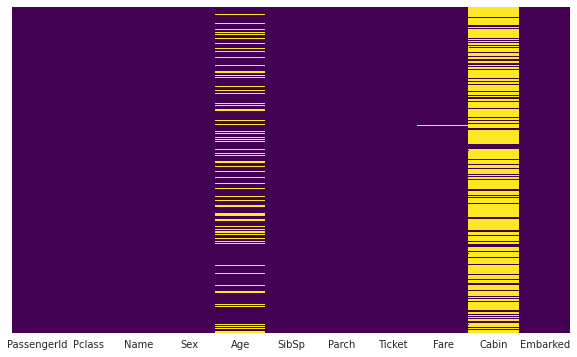

In [ ]:
# Check for missing data
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Missing values 
print((df_test.isnull().sum()).sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


In [ ]:
# Missing values in %
print((df_test.isnull().mean()*100).sort_values(ascending=False))

Cabin          78.229665
Age            20.574163
Fare            0.239234
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64


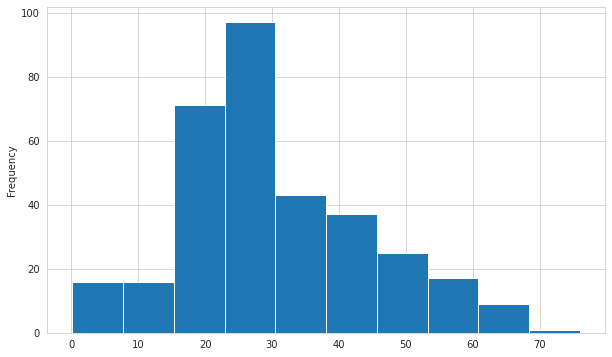

In [ ]:
df_test['Age'].dropna().plot.hist()

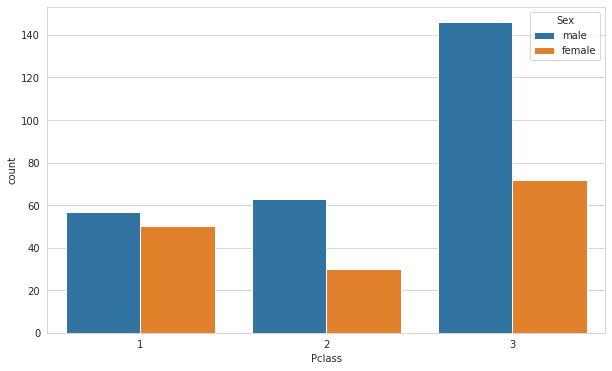

In [ ]:
sns.countplot(x='Pclass', hue='Sex',data=df_test)

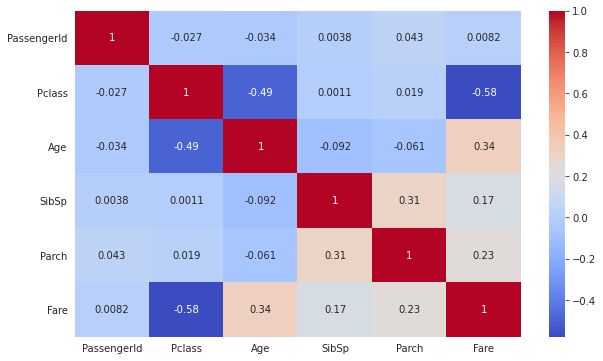

In [ ]:
sns.heatmap(df_test.corr(), annot=True, cmap='coolwarm')

## Filling missing data in  *df_test*




In [ ]:
# As only 0.2% Fare values are missing, we can fill those with mean
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

In [ ]:
# We can verify the same
df_test['Fare'].isnull().sum()

0

### Using LinearRegression model to predict missing Age

The '*df_test*' is divided in to two parts
- Data Frame with "**Available Age**" (Training Data set)
- Data Frame with "**Missing Age**" (Testing Data set)


In [ ]:
df_test_missingAge = df_test[df_test['Age'].isnull()]
print('No of data points with Age missing = {}\n'.format(len(df_test_missingAge)))
print(df_test_missingAge)

No of data points with Age missing = 86

     PassengerId  Pclass  ... Cabin Embarked
10           902       3  ...   NaN        S
22           914       1  ...   NaN        S
29           921       3  ...   NaN        C
33           925       3  ...   NaN        S
36           928       3  ...   NaN        S
..           ...     ...  ...   ...      ...
408         1300       3  ...   NaN        Q
410         1302       3  ...   NaN        Q
413         1305       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[86 rows x 11 columns]


In [ ]:
df_test_availableAge = df_test[df_test['Age'].notnull()]
print('No of data points with Age NOT missing = {}\n'.format(len(df_test_availableAge)))
print(df_test_availableAge)

No of data points with Age NOT missing = 332

     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
409         1301       3  ...   NaN        S
411         1303       1  ...   C78        Q
412         1304       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S

[332 rows x 11 columns]


In [ ]:
# All numerical cols of known Age data points as training data
X_train2 = df_test_availableAge[['Pclass', 'Fare', 'SibSp','Parch']] 

# Age of known data points as Target
y_train2 = df_test_availableAge['Age']

# All numerical cols of missing Age data points as training data
X_test2 = df_test_missingAge[['Pclass', 'Fare', 'SibSp','Parch']]

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_age2 = lr2.predict(X_test2)
predicted_age2 = np.round(predicted_age2,1)
print(predicted_age2)

[24.4 39.3 21.9 21.3 24.4 25.7 39.2 24.4 31.7 23.2 31.9 24.4 24.4 31.6
 23.2 24.4 24.4 24.4 24.4 24.4 24.4 24.4 24.4 23.  24.4 22.  20.6 22.9
 39.8 39.2 24.4 24.4 24.4 39.2 24.4 24.4 24.4 12.5 39.1 24.4 24.6 39.1
 24.4 24.4 24.4 22.5 24.4 24.4 24.4 21.3 23.2 24.4 24.4 24.4 38.5 24.4
 24.4 24.4 23.2 24.4 24.4 24.4 24.4 24.4 39.5 24.4 21.9 31.7 24.4 24.4
 24.4 24.4 15.1 22.1 24.4 24.4 15.1 23.2 24.4 24.6 31.7 24.4 24.4 24.4
 24.4 22.3]


### DataFrame *df_test* with predicted Age



In [ ]:
final_df_test = df_test.copy() #Make a copy of df_test
final_df_test.loc[final_df_test['Age'].isnull(), 'Age'] = predicted_age2
final_df_test.head(20) #df_test with filled Age 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Cleaning Testing Data 

In [ ]:
# After filling Age column, we check misiing values again
print(round((final_df_test.isnull().mean()*100).sort_values(ascending=False),2))

Cabin          78.23
Embarked        0.00
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Age             0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64


In [ ]:
# Lot of data in Cabin is missing hence Cabin is not useful, so let's drop
final_df_test.drop('Cabin', axis=1, inplace=True) 

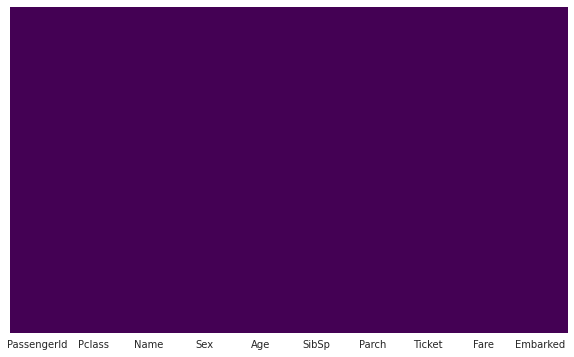

In [ ]:
# Let's check again if any data is missing
sns.heatmap(final_df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [ ]:
# Dropping 'Name' and 'Ticket'
final_df_test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
print(final_df_test)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0            892       3    male  34.5      0      0    7.8292        Q
1            893       3  female  47.0      1      0    7.0000        S
2            894       2    male  62.0      0      0    9.6875        Q
3            895       3    male  27.0      0      0    8.6625        S
4            896       3  female  22.0      1      1   12.2875        S
..           ...     ...     ...   ...    ...    ...       ...      ...
413         1305       3    male  24.4      0      0    8.0500        S
414         1306       1  female  39.0      0      0  108.9000        C
415         1307       3    male  38.5      0      0    7.2500        S
416         1308       3    male  24.4      0      0    8.0500        S
417         1309       3    male  22.3      1      1   22.3583        C

[418 rows x 8 columns]


## Preparing Testing Data 

In [ ]:
Sex2 = pd.get_dummies(final_df_test['Sex'], drop_first=True)
print(Sex2)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]


In [ ]:
Embarked2 = pd.get_dummies(final_df_test['Embarked'], drop_first=True)
print(Embarked2)

     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]


In [ ]:
final_df_test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
final_df_test = pd.concat([final_df_test, Sex2, Embarked2], axis=1)

Final Testing Data

In [ ]:
print(final_df_test)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0            892       3  34.5      0      0    7.8292     1  1  0
1            893       3  47.0      1      0    7.0000     0  0  1
2            894       2  62.0      0      0    9.6875     1  1  0
3            895       3  27.0      0      0    8.6625     1  0  1
4            896       3  22.0      1      1   12.2875     0  0  1
..           ...     ...   ...    ...    ...       ...   ... .. ..
413         1305       3  24.4      0      0    8.0500     1  0  1
414         1306       1  39.0      0      0  108.9000     0  0  0
415         1307       3  38.5      0      0    7.2500     1  0  1
416         1308       3  24.4      0      0    8.0500     1  0  1
417         1309       3  22.3      1      1   22.3583     1  0  0

[418 rows x 9 columns]


# Logistic Regression Model to Predict Survivors

In [ ]:
X_train = final_df_train.drop(['Survived','PassengerId'], axis=1)
y_train = final_df_train['Survived'] 
X_test = final_df_test.drop('PassengerId', axis=1)

In [ ]:
log = LogisticRegression(max_iter=1000)
param_grid = {'C':[0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(log, param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.788, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.798, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.798, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.775, total=   0.0s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.843, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.788, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.815, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.803, total=   0.1s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.775, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.820, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.788, total=   0.1s
[CV] C=10 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [ ]:
print(grid.best_estimator_)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
predicted = grid.predict(X_test)
print(predicted)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
predicted = pd.DataFrame({'PassengerId':final_df_test['PassengerId'], 'Survived': predicted})
print(predicted)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
# Output data file obtained from Kaggle 'gender_submission.csv' as df
# This df obtained from kaggle is not Actual file but an example, anyway let's compare here
print(df)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


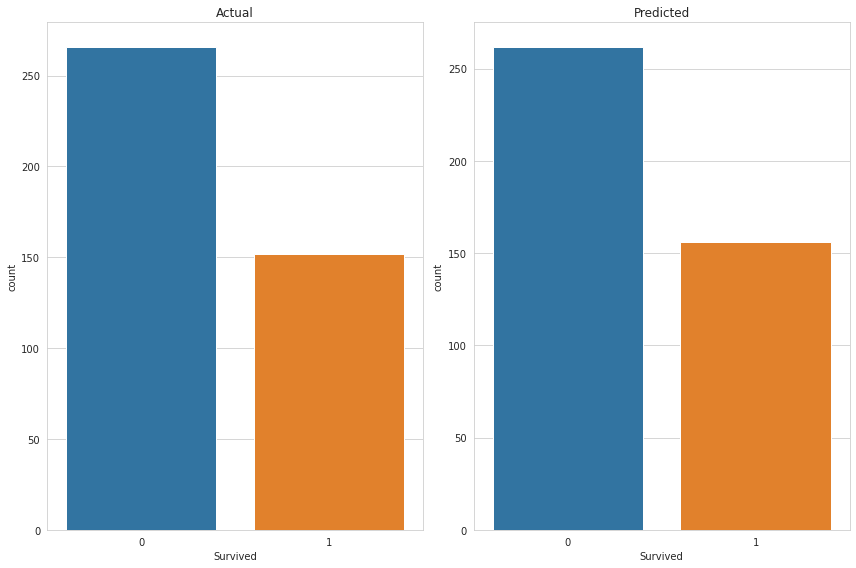

In [ ]:
# Plotting the Actual and Predicted data
fig, ax = plt.subplots(1,2, figsize=(12,8))
sns.countplot(df['Survived'], ax=ax[0])
sns.countplot(predicted['Survived'], ax=ax[1])
ax[0].set(xlabel='Survived', title='Actual')
ax[1].set(xlabel='Survived', title='Predicted')
plt.tight_layout()

In [ ]:
# Classification Report
print(metrics.classification_report(df['Survived'],predicted['Survived']))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.92      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



In [ ]:
# Confusion Matrix
print(metrics.confusion_matrix(df['Survived'],predicted['Survived']))

[[250  16]
 [ 12 140]]


In [ ]:
# Accuracy
print(metrics.accuracy_score(df['Survived'],predicted['Survived'])*100)

93.30143540669856
